## Use Logistic Model for Default Prediction

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [57]:
df = pd.read_csv("/Users/61310joy/Default_Predict/Data/regression_data/encoded_features.csv")
df.head()

/var/folders/qw/h2s12w2524z6vtfqym33s89m0000gn/T/ipykernel_4178/3684334738.py:1: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/Users/61310joy/Default_Predict/Data/regression_data/encoded_features.csv")


,Loan Sequence Number,Credit Score,Original Loan-to-Value (LTV),Original Combined Loan-to-Value (CLTV),Original Debt-to-Income (DTI) Ratio,Original Interest Rate,Original UPB,Current Actual UPB,Loan Age,Remaining Months to Legal Maturity,...,Property State_TN,Property State_TX,Property State_UT,Property State_VA,Property State_VI,Property State_VT,Property State_WA,Property State_WI,Property State_WV,Property State_WY
0,F20Q10000001,661,36,36,19,2.875,66000,40665.26,58,122,...,False,False,False,False,False,False,False,False,False,False
1,F20Q10000002,681,95,95,13,5.750,52000,46807.70,61,299,...,False,False,False,False,False,False,False,False,False,False
2,F20Q10000003,775,87,87,29,3.250,248000,0.00,24,336,...,False,False,False,False,False,False,False,False,False,False
3,F20Q10000004,770,65,65,14,3.625,125000,89979.70,61,119,...,False,False,False,False,False,False,False,False,False,False
4,F20Q10000005,791,80,80,33,3.875,58000,47698.13,60,300,...,False,False,False,False,False,False,False,False,False,False


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11569815 entries, 0 to 11569814
Data columns (total 77 columns):
 #   Column                                  Dtype  
---  ------                                  -----  
 0   Loan Sequence Number                    object 
 1   Credit Score                            int64  
 2   Original Loan-to-Value (LTV)            int64  
 3   Original Combined Loan-to-Value (CLTV)  int64  
 4   Original Debt-to-Income (DTI) Ratio     int64  
 5   Original Interest Rate                  float64
 6   Original UPB                            int64  
 7   Current Actual UPB                      float64
 8   Loan Age                                int64  
 9   Remaining Months to Legal Maturity      int64  
 10  Estimated Loan-to-Value (ELTV)          int64  
 11  Current Loan Delinquency Status         object 
 12  Number of Borrowers                     int64  
 13  Property State                          object 
 14  Current Deferred UPB            

### Feature Selection

#### Check VIF(Multicollinearity)

In [59]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [60]:
X = df[[
    'Credit Score', 'Original Loan-to-Value (LTV)',
    'Original Combined Loan-to-Value (CLTV)',
    'Original Debt-to-Income (DTI) Ratio',
    'Original Interest Rate', 'Original UPB','Current Actual UPB',
    'Loan Age', 'Remaining Months to Legal Maturity',
    'Estimated Loan-to-Value (ELTV)', 'Number of Borrowers',
    'Current Interest Rate', 'Original Loan Term', 'Current Deferred UPB'
]]

#Count VIF 
vif_data = pd.DataFrame()
vif_data["Features"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data)

                                  Features            VIF
0                             Credit Score      61.583627
1             Original Loan-to-Value (LTV)    1177.395275
2   Original Combined Loan-to-Value (CLTV)    1179.414908
3      Original Debt-to-Income (DTI) Ratio       8.752397
4                   Original Interest Rate  105312.881974
5                             Original UPB      15.396219
6                       Current Actual UPB      11.648417
7                                 Loan Age      44.262240
8       Remaining Months to Legal Maturity    1590.621502
9           Estimated Loan-to-Value (ELTV)       3.159415
10                     Number of Borrowers       8.940008
11                   Current Interest Rate  105336.238893
12                      Original Loan Term    1992.128368
13                    Current Deferred UPB       1.031555


From VIF, drop `Original Loan-to-Value (LTV)`, `Original Combined Loan-to-Value (CLTV)`, `Original Interest Rate`, `Remaining Months to Legal Maturity`, `Original Loan Term`

In [61]:
df_selected = df.copy()

drop_list = [
    'Loan Sequence Number',
    'Original Loan-to-Value (LTV)',
    'Original Combined Loan-to-Value (CLTV)',
    'Original Interest Rate',
    'Remaining Months to Legal Maturity',
    'Original Loan Term',
    'Default.1',
    'Default.2',
    'Property State',
    'Occupancy Status',
    'First Payment Date',
    'Current Loan Delinquency Status'
]

df_final = df_selected.drop(columns=drop_list, errors='ignore')
df_final.columns

Index(['Credit Score', 'Original Debt-to-Income (DTI) Ratio', 'Original UPB',
       'Current Actual UPB', 'Loan Age', 'Estimated Loan-to-Value (ELTV)',
       'Number of Borrowers', 'Current Deferred UPB', 'Current Interest Rate',
       'Default', 'Occupancy Status_I', 'Occupancy Status_S',
       'Property State_AL', 'Property State_AR', 'Property State_AZ',
       'Property State_CA', 'Property State_CO', 'Property State_CT',
       'Property State_DC', 'Property State_DE', 'Property State_FL',
       'Property State_GA', 'Property State_GU', 'Property State_HI',
       'Property State_IA', 'Property State_ID', 'Property State_IL',
       'Property State_IN', 'Property State_KS', 'Property State_KY',
       'Property State_LA', 'Property State_MA', 'Property State_MD',
       'Property State_ME', 'Property State_MI', 'Property State_MN',
       'Property State_MO', 'Property State_MS', 'Property State_MT',
       'Property State_NC', 'Property State_ND', 'Property State_NE',
      

In [62]:
df_final['Default'].value_counts()

Default
0    11524257
1       45558
Name: count, dtype: int64

The data is very inbalanced

In [63]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

In [64]:
# -------------------------------------------
# Split data into features (X) and target (y)
# -------------------------------------------
target_col = 'Default'

y = df_final[target_col].astype(int)
X = df_final.drop(columns=[target_col], errors='ignore')

# -------------------------------------------
# Train/test split (using only 100k rows for training)
# -------------------------------------------
sample_size = 100_000

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    train_size=sample_size,
    random_state=42,
    stratify=y
)

# -------------------------------------------
# Build the Pipeline
#    Step 1: StandardScaler (fit only inside CV folds)
#    Step 2: Logistic Regression with L2 penalty
# -------------------------------------------
pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("logreg", LogisticRegression(
        solver='lbfgs',
        penalty='l2',
        max_iter=1000,
        tol=1e-6,
        class_weight='balanced',
        random_state=42
    ))
])

# -------------------------------------------
# Hyperparameter grid
#    Note: use "logreg__C" (stepName__parameterName)
# -------------------------------------------
param_grid = {
    "logreg__C": np.logspace(-3, 1, 5)   # 0.001 → 10
}

# -------------------------------------------
# Stratified 5-fold cross-validation
# -------------------------------------------
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# -------------------------------------------
# Grid search with ROC-AUC as scoring metric
# -------------------------------------------
grid = GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
    scoring="roc_auc",
    cv=cv,
    n_jobs=-1,
    verbose=1
)

print("Running grid search with Pipeline...")
grid.fit(X_train, y_train)
best_C = grid.best_params_['logreg__C']

print("Best parameters:", grid.best_params_)
print(f"Best CV AUC: {grid.best_score_:.4f}")

In [69]:
# -------------------------------------------
# Get the best model from grid search
# -------------------------------------------
best_model = grid.best_estimator_

y_test_proba = best_model.predict_proba(X_test)[:, 1]
y_test_pred = best_model.predict(X_test) 

### Threshold Testing 

In [94]:
from sklearn.metrics import roc_auc_score, confusion_matrix, classification_report

def find_best_j_threshold(y_true, y_proba):
    """
    Scan thresholds from 0.01 to 0.99 and return the threshold
    that maximizes Youden's J statistic (TPR - FPR).
    """
    thresholds = np.arange(0.01, 1.00, 0.01)

    best_j = -1
    best_thres = None

    for thres in thresholds:
        y_pred = (y_proba >= thres).astype(int)

        tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
        tpr = tp / (tp + fn + 1e-12)
        fpr = fp / (fp + tn + 1e-12)

        j_stat = tpr - fpr

        if j_stat > best_j:
            best_j = j_stat
            best_thres = thres

    return best_thres, best_j


# Find best J threshold
best_j_threshold, best_j_value = find_best_j_threshold(y_test, y_test_proba)
print("Best J Threshold:", best_j_threshold)
print("Best J Value:", best_j_value)

# Predict with best J threshold
y_test_pred_j = (y_test_proba >= best_j_threshold).astype(int)

# Evaluate on test set
test_auc = roc_auc_score(y_test, y_test_proba)
print(f"\nTest ROC-AUC: {test_auc:.4f}")

print("\nConfusion Matrix at Best J Threshold:")
print(confusion_matrix(y_test, y_test_pred_j))

print("\nClassification Report at Best J Threshold:")
print(classification_report(y_test, y_test_pred_j))

Best J Threshold: 0.46
Best J Value: 0.5162930836830213

Test ROC-AUC: 0.8367

Confusion Matrix at Best J Threshold:
[[8543916 2880735]
 [  10458   34706]]

Classification Report at Best J Threshold:
              precision    recall  f1-score   support

           0       1.00      0.75      0.86  11424651
           1       0.01      0.77      0.02     45164

    accuracy                           0.75  11469815
   macro avg       0.51      0.76      0.44  11469815
weighted avg       0.99      0.75      0.85  11469815



## Model Result 

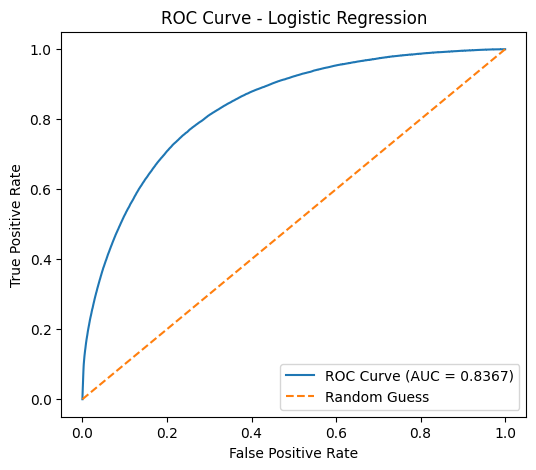

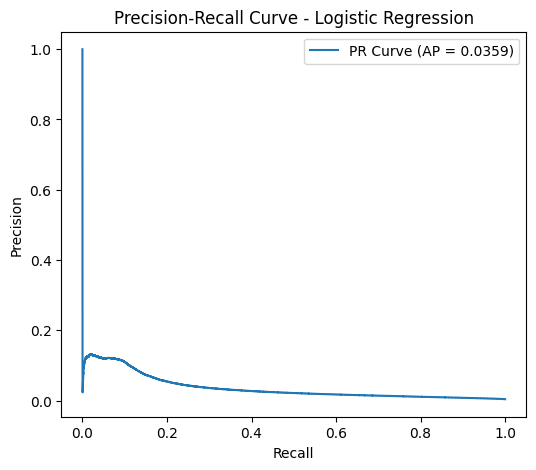

In [95]:
from sklearn.metrics import precision_recall_curve, average_precision_score

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_test_proba)
auc_score = roc_auc_score(y_test, y_test_proba)

# Plot
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {auc_score:.4f})")
plt.plot([0, 1], [0, 1], linestyle="--", label="Random Guess")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Logistic Regression")
plt.legend()
plt.grid(False)
plt.show()

# Compute precision-recall curve
precision, recall, pr_thresholds = precision_recall_curve(y_test, y_test_proba)
ap = average_precision_score(y_test, y_test_proba)

# Plot
plt.figure(figsize=(6,5))
plt.plot(recall, precision, label=f"PR Curve (AP = {ap:.4f})")

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve - Logistic Regression")
plt.legend()
plt.grid(False)
plt.show()

## SHAP Analysis

In [76]:
import shap

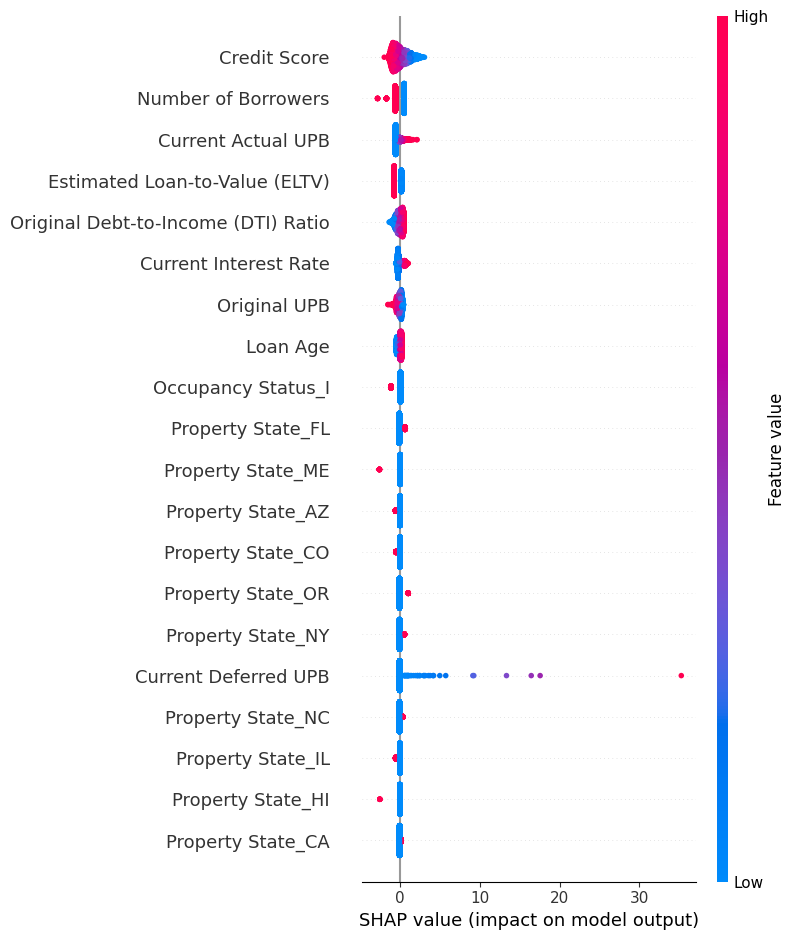

<Figure size 640x480 with 0 Axes>

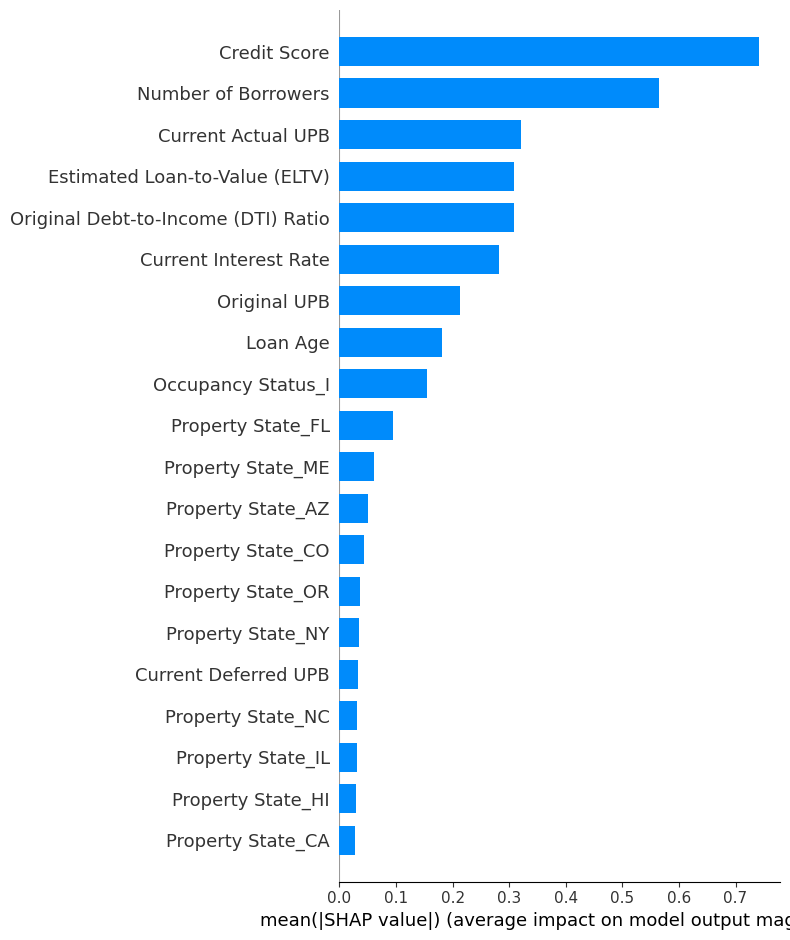

<Figure size 640x480 with 0 Axes>

In [88]:
background_size = 10_000
explain_size = 5_000

X_train_bg = X_train.sample(n=background_size, random_state=42)
X_test_explain = X_test.sample(n=explain_size, random_state=42)

# Extract scaler and logistic regression from the Pipeline
scaler = best_model.named_steps["scaler"]
logreg = best_model.named_steps["logreg"]

# Scale background and test samples
X_train_bg_scaled = scaler.transform(X_train_bg)
X_test_explain_scaled = scaler.transform(X_test_explain)

# Create a SHAP explainer for a linear model (Logistic Regression)
explainer = shap.LinearExplainer(
    logreg,
    X_train_bg_scaled
)

# Compute SHAP values for the test sample
shap_values = explainer.shap_values(X_test_explain_scaled)

# Summary plot (beeswarm) - global feature importance and direction
shap.summary_plot(
    shap_values,
    X_test_explain_scaled,
    feature_names=X_test.columns
)

# Bar plot for mean absolute SHAP values
plt.figure(figsize=(10, 8)) 

shap.summary_plot(
    shap_values,
    X_test_explain_scaled,
    feature_names=X_test.columns,
    plot_type="bar"
)
